<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/Exploration_quest/exploration_3/xp3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6-1. 프로젝트: 인물 모드 문제점 찾기

**Index**

    Set up
    Step 1. 사진 제작하기
            (1) 인물 사진
            (2) 동물 사진
            (3) 배경 전환 크로마키 사진
            
    Step 2. 문제점 찾기
    Step 3. 해결 방법 제안

### Set up

In [ ]:
import os
import urllib
import cv2
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print("CV2 version:", cv2.__version__)
print("PixelLib version:", version('pixellib'))

print("\nAre you ready?")

CV2 version: 4.5.3
PixelLib version: 0.7.1

Are you ready?


###  Step 1. 사진 제작하기 (1) 인물 사진

사진을 준비하겠습니다. 사용할 디렉터리 구조는 아래와 같습니다.

```
  aiffel/human_segmentation
    ├── models
    │   └── deeplabv3_xception_tf_dim_ordering_tf_kernels.h5
    │
    └── images
         ├── autumn.png
         ├── cutie.png
         ├── galaxy.png
         ├── hi.png
         ├── lewis.png
         ├── salty.png
         ├── sami.png
         └── wildone.png
```

In [ ]:
def segment_person_image(img_path):
    img = cv2.imread(img_path)

    model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

    # colormap[15]
    # array([192, 128, 128])

    seg_color = (128, 128, 192)
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255

    img_blur = cv2.blur(img, (40, 40))

    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

    img_concat = np.where(img_mask_color == 255, img, img_bg_blur)

    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

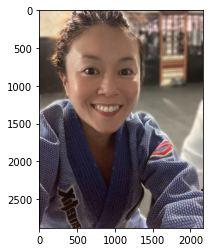

In [ ]:
wildone = os.getenv('HOME') + '/aiffel/human_segmentation/images/wildone.png'
segment_person_image(wildone)

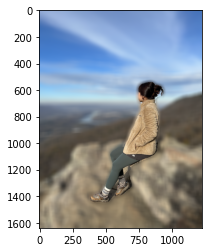

In [ ]:
autumn = os.getenv('HOME') + '/aiffel/human_segmentation/images/autumn.png'
segment_person_image(autumn)

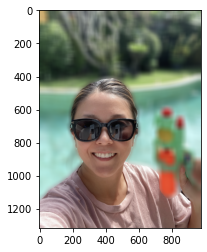

In [ ]:
hi = os.getenv('HOME') + '/aiffel/human_segmentation/images/hi.png'
segment_person_image(hi)

### Step 1. 사진 제작하기 (1) 동물 사진

In [ ]:
def segment_dog_image(img_path):
    img = cv2.imread(img_path)

    model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

    # colormap[12]
    # array([ 64, 0, 128])

    seg_color = (128, 0, 64)
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255

    img_blur = cv2.blur(img, (40, 40))

    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

    img_concat = np.where(img_mask_color == 255, img, img_bg_blur)

    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

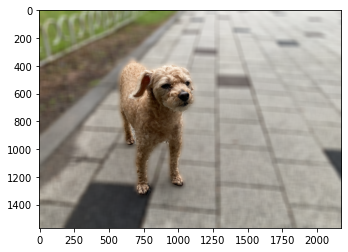

In [ ]:
salty = os.getenv('HOME') + '/aiffel/human_segmentation/images/salty.png'
segment_dog_image(salty)

In [ ]:
def segment_cat_image(img_path):
    img = cv2.imread(img_path)

    model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

    # colormap[8]
    # array([64, 0, 0])

    seg_color = (0, 0, 64)
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255

    img_blur = cv2.blur(img, (80, 80))

    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

    img_concat = np.where(img_mask_color == 255, img, img_bg_blur)

    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

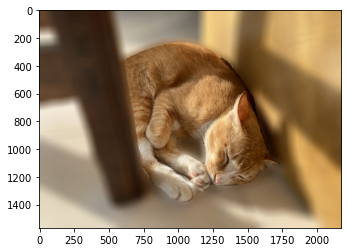

In [ ]:
sami = os.getenv('HOME') + '/aiffel/human_segmentation/images/sami.png'
segment_cat_image(sami)

### Step 1. 사진 제작하기 (3) 배경 전환 크로마키 사진

**Hello, World**

Salty's original shape: (1568, 2178, 3)
Resized shape for salty: (1080, 1769, 3)


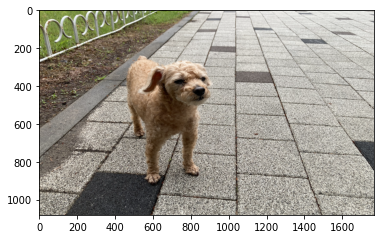

In [ ]:
# Hello, world.

salty = os.getenv('HOME') + '/aiffel/human_segmentation/images/salty.png'
salty_img = cv2.imread(salty)

print("Salty's original shape:", salty_img.shape)

resized_salty = cv2.resize(salty_img, (1769, 1080))
print("Resized shape for salty:", resized_salty.shape)

plt.imshow(cv2.cvtColor(resized_salty, cv2.COLOR_BGR2RGB))
plt.show()

(1080, 1769, 3)


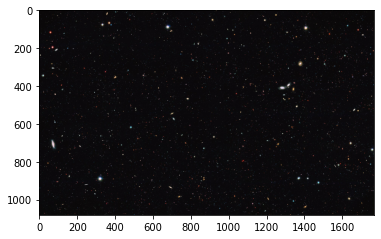

In [ ]:
# I will take you to my galaxy!

galaxy = os.getenv('HOME') + '/aiffel/human_segmentation/images/galaxy.png'
galaxy_img = cv2.imread(galaxy)

print(galaxy_img.shape)

plt.imshow(cv2.cvtColor(galaxy_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Load the segmentation model

model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f21636f2b20>)

In [ ]:
# Perform semantic segmentation

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(salty)

In [ ]:
# Extract my segmentation mask

seg_color = (128, 0, 64)
seg_map = np.all(output == seg_color, axis=-1)
salty_mask = seg_map.astype(np.uint8) * 255

print("My original mask shape:", salty_mask.shape)

resized_salty_mask = cv2.resize(salty_mask, (1769, 1080))
print("Resized mask shape:", resized_salty_mask.shape)

My original mask shape: (1568, 2178)
Resized mask shape: (1080, 1769)


In [ ]:
# Apply blur to galaxy

galaxy_blur = cv2.blur(galaxy_img, (1, 1))

In [ ]:
# Apply color map to my mask

salty_mask_color = cv2.cvtColor(resized_salty_mask, cv2.COLOR_GRAY2BGR)
galaxy_mask = cv2.bitwise_not(salty_mask_color)
background_blur_masked = cv2.bitwise_and(galaxy_blur, galaxy_mask)

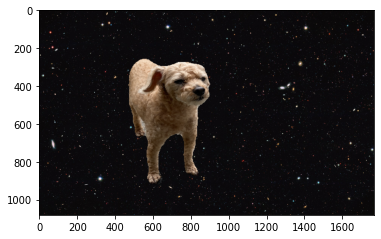

In [ ]:
# Welcome to my galaxy!
result_img = np.where(salty_mask_color == 255, resized_salty, background_blur_masked)

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.show()

**Jungle**

Lewis's original shape: (596, 1280, 3)
Resized Lewis: (600, 1280, 3)


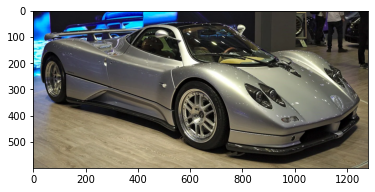

In [ ]:
# Load 1st image

lewis_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/lewis.png'
lewis_img = cv2.imread(lewis_path)

print("Lewis's original shape:", lewis_img.shape)

lewis_img = cv2.resize(lewis_img, (1280, 600))
print("Resized Lewis:", lewis_img.shape)

plt.imshow(cv2.cvtColor(lewis_img, cv2.COLOR_BGR2RGB))
plt.show()

Cutie's original shape: (3210, 5213, 3)
Resized Cutie: (600, 1280, 3)


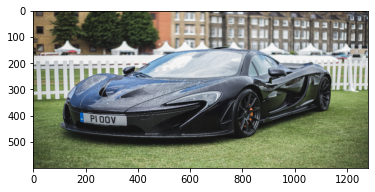

In [ ]:
# Load 2nd image

cutie_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/cutie.png'
cutie_img = cv2.imread(cutie_path)

print("Cutie's original shape:", cutie_img.shape)

cutie_img = cv2.resize(cutie_img, (1280, 600))
print("Resized Cutie:", cutie_img.shape)

plt.imshow(cv2.cvtColor(cutie_img, cv2.COLOR_BGR2RGB))
plt.show()

Original background: (1080, 1769, 3)
Resized background: (600, 1280, 3)


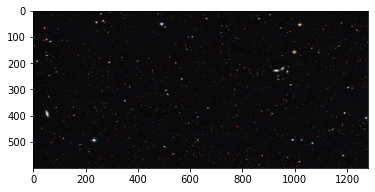

In [ ]:
# Load the background image

galaxy = os.getenv('HOME') + '/aiffel/human_segmentation/images/galaxy.png'
galaxy_img = cv2.imread(galaxy)

print("Original background:", galaxy_img.shape)

resized_bg = cv2.resize(galaxy_img, (1280, 600))
print("Resized background:", resized_bg.shape)

plt.imshow(cv2.cvtColor(resized_bg, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Load the segmentation model

model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fbaaa286ee0>)

In [ ]:
# Perform semantic segmentation on Lewis & Cutie

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
segvalues_1, output_1 = model.segmentAsPascalvoc(lewis_path)
segvalues_2, output_2 = model.segmentAsPascalvoc(cutie_path)

In [ ]:
# Extract segmentation masks for both

# colormap[7]
# array([128, 128, 128])

seg_color = (128, 128, 128)
seg_map_1 = np.all(output_1 == seg_color, axis=-1)
lewis_mask = seg_map_1.astype(np.uint8) * 255
lewis_mask = cv2.resize(lewis_mask, (1280, 600))

seg_map_2 = np.all(output_2 == seg_color, axis=-1)
cutie_mask = seg_map_2.astype(np.uint8) * 255
cutie_mask = cv2.resize(cutie_mask, (1280, 600))

print(lewis_mask.shape)
print(cutie_mask.shape)

(600, 1280)
(600, 1280)


In [ ]:
# Apply blur to the background

bg_blur = cv2.blur(resized_bg, (1, 1))

In [ ]:
# Apply color maps to the masks

lewis_mask_color = cv2.cvtColor(lewis_mask, cv2.COLOR_GRAY2BGR)
cutie_mask_color = cv2.cvtColor(cutie_mask, cv2.COLOR_GRAY2BGR)

In [ ]:
# Create masks for each

bg_mask1 = cv2.bitwise_not(lewis_mask_color)
bg_mask2 = cv2.bitwise_not(cutie_mask_color)

In [ ]:
# Apply masks to the background image

bg_blur_masked1 = cv2.bitwise_and(bg_blur, bg_mask1)
bg_blur_masked2 = cv2.bitwise_and(bg_blur, bg_mask2)

In [ ]:
# Calculate the midpoint for positioning the two cars

# midpoint = int(resized_bg.shape[1] / 2)

In [ ]:
# Calculate the width for each car considering some spacing

# obj_width = int(min(lewis_img.shape[1], cutie_img.shape[1]))

In [ ]:
# Resize to fit within the calculated width

# lewis_resized = cv2.resize(lewis_img, (obj_width, int(obj_width * (lewis_img.shape[0] / lewis_img.shape[1]))))
# cutie_resized = cv2.resize(cutie_img, (obj_width, int(obj_width * (cutie_img.shape[0] / cutie_img.shape[1]))))

# print(lewis_resized.shape)
# print(cutie_resized.shape)

In [ ]:
# Calculate the position to place both

# start_x1 = int(midpoint - obj_width)
# end_x1 = start_x1 + obj_width

In [ ]:
# start_x2 = int(midpoint)
# end_x2 = start_x2 + obj_width

In [ ]:
# Combine both cars and the background image based on the masks

result1 = np.where(lewis_mask_color == 255, lewis_resized, bg_blur_masked1)
result2 = np.where(cutie_mask_color == 255, cutie_resized, bg_blur_masked2)

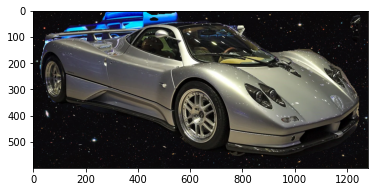

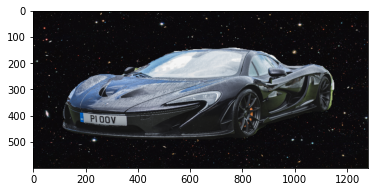

In [ ]:
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Create an empty canvas large enough to accommodate both cars

# combined_result = np.zeros((max(lewis_resized.shape[0], cutie_resized.shape[0]), resized_bg.shape[1], 3), dtype=np.uint8)

In [ ]:
# Place the first object (result1) on the left side of the background

# combined_result[:lewis_resized.shape[0], start_x1:end_x1] = result1
# combined_result[:cutie_resized.shape[0], start_x2:end_x2] = result2

In [ ]:
result = cv2.bitwise_or(result1, result2)

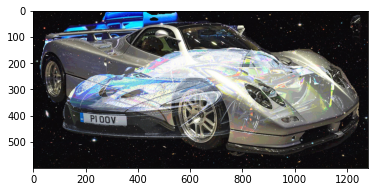

In [ ]:
# Display the result

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

두 개의 객체가 하나의 이미지로 합성되었죠? 코드 사이 사이에 삽입 된 주석 처리된 코드들을 사용해서 두 객체 사이에 거리를 조정할 수 있도록 디자인했으나, 공간 삽입과 거리 조정 부분에서 value 값이 일치하지 않는 오류가 발생했습니다. 이 부분에 대해서 더 고민한 후 수정하겠습니다!

### Step 2. 문제점 찾기

![](https://drive.google.com/uc?export=view&id=1QPvcwI3a-eFTh0R_shjFyWKBILdej7bd)

>인물 사진에 대한 원본과 Semantic Segmentation 작업 후의 결과물을 비교하겠습니다. 인물 사진에서 인물과 배경을 분리한 다음, 배경에만 블러 처리를 진행하였고, 원본과 블러 처리된 배경을 합성했습니다. 합성 후의 결과물을 보면 인물에 해당하는 객체의 경계가 배경으로부터 명확하지 않은 부분을 발견할 수 있습니다. 특히 인물의 머리카락, 오른쪽 발, 오른쪽 무릎 부분에 대한 경계가 흐릿합니다.

![](https://drive.google.com/uc?export=view&id=1Mfd9MMFJ4UEBjtg_9USyWSyM0Wjr_Csp)

>앞서 결과물과 같이 인물 사진에서 인물과 배경을 분리한 다음, 배경에만 블러 처리를 진행하였고, 원본과 블러 처리된 배경을 합성했습니다. 합성 후의 결과물을 보면 인물에 해당하는 객체의 경계가 배경으로부터 명확하지 않은 부분을 발견할 수 있습니다. 특히 인물이 물총을 잡고 있는 왼손의 경우, 물총과 왼손의 경계가 명확하지 않습니다.

![](https://drive.google.com/uc?export=view&id=14Ol8jGf2C3ge1vbEG34cgbPsgwMWuMtW)

>강아지와 배경이 있는 사진에서 강아지와 배경을 분리한 다음, 배경에만 블러 처리를 진행하였고, 원본과 블러 처리된 배경을 합성했습니다. 이 후, 새로운 사진을 배경으로 하여 원본에 있던 강아지 사진과 합성했습니다. 합성 후의 결과물을 보면 강아지의 몸 부분에서 추출되지 못 한 부분이 있습니다. 원본 사진과 비교하면 잘 확인할 수 있습니다. 강아지의 꼬리부분이 추출되지 못 했고, 강아지의 배 부분의 경계가 흐릿합니다.

![](https://drive.google.com/uc?export=view&id=1ScKat5EtlM1OyTDtIbdTGLno3RussjLb)

>그렇습니다. 대혼란. 두 객체 사이에 거리감을 줄 수 있도록 위치 조정, 공간 삽입 등을 시도했으나 아직 답을 찾지 못했습니다. 각각의 객체가 반 씩 잘린 상태로 마치 지킬앤하이드처럼 반 씩 합성된 형태로 나타나거나, 각각 반 씩 잘린 상태이면서 중간에 검은색 공간이 삽입된 형태로 나타나는 기이한 결과가 있었습니다. 각각의 객체가 온전한 모습으로 그러면서 중간에 거리를 두고 위치할 수 있도록 수정할 계획입니다.

**"대혼란" 이렇게 수습했습니다!**

![](https://drive.google.com/uc?export=view&id=1KNdeWqYgKENmTK2GzeQgvTFzwXXqvMa-)

![](https://drive.google.com/uc?export=view&id=1hLbbwZfn-o_eFjGaBRBOU7qNSCZ6bsAC)

![](https://drive.google.com/uc?export=view&id=1dW0ua5zrWMbB1DIsnU2jKsoDiYaJedks)

![](https://drive.google.com/uc?export=view&id=1MCQ6tGSCAVfALv8xTpddYOHfbkupLKCu)

>위의 코드를 응용하면 각각 다른 이미지를 배경과 합성할 수 있습니다. 양 쪽의 자동차가 마주보는 모습으로 다시 작업할 계획입니다. 흥미롭습니다!

참고 자료

* [CV2.HCONCAT()](https://theailearner.com/tag/cv2-hconcat/)

### Step 3. 해결 방법 제안

이미지 데이터를 활용하여 Semantic Segmentation을 진행한 후 결과물을 살펴보니, 객체와 배경이 합성된 후에 배경 이미지에 대해 강한 블러처리를 선행했음에도 객체와 배경 간의 경계가 명확하지 않은 부분을 확인할 수 있었습니다. 이러한 문제를 해결하기 위해 다음과 같은 솔루션이 있습니다.

*  모델 파인 튜닝 Fine-tuning
*  포스트 프로세싱 기법 Post-processing techniques
*  그라디언트 부스팅 Gradient Boosting
*  Instance Segmentation 사용하기

**모델 파인 튜닝 Fine-tuning**

DeepLab 모델은 사진 속 물체를 정확하게 분리하고 싶을 때 사용되는 특별한 컴퓨터 프로그램이에요. 이 모델은 이미지에서 물체와 배경을 구분하는데 도와주는데, 이를 Semantic Segmentation 이라고 해요. 하지만, 처음에 모델을 만들 때는 모든 종류의 물체와 배경을 고려하기는 어려워요. 때로는 모델이 그렇게 완벽하지 않을 수 있어요. 이를 개선하기 위해 모델을 추가로 학습시키는 것을 `Fine-tuning` 이라고 해요.

`Fine-tuning`은 원래 만들어진 모델을 좀 더 특별하게 만들어주는 과정이에요. DeepLab 모델은 이미지에서 물체와 배경을 분리하는 걸 잘하지만, 특정한 작업을 위해서는 더 정확한 결과를 내야 할 때가 있어요. 이때, `Fine-tuning`을 사용해서 모델을 조금 더 배우게 하고, 그 작업에 더 잘 맞도록 만들 수 있어요. `Fine-tuning`을 하는 방법 중 하나는 추가적인 학습을 시키는 것이에요. 모델에게 더 많은 예제를 보여주고, 그것들을 바탕으로 모델이 물체와 배경을 더 세밀하게 구분하도록 가르치는 거죠. 그렇게 하면 모델은 이전보다 더 정확하고 세부적인 경계를 예측할 수 있어요. 왜냐하면 모델은 처음에는 여러 가지 다른 종류의 데이터를 보고 배웠는데, 우리가 원하는 작업에 맞게끔 특별히 가르쳐주지 않았기 때문이에요. 이런 이유로 `Fine-tuning`을 통해 모델을 특정 작업에 더 적합하고 정확하게 만들 수 있어요. 그래서, DeepLab 모델을 사용할 때 `Fine-tuning`을 선택하는 이유는 모델이 원하는 작업에 더 잘 맞도록 만들어주기 위해서에요. 이 작업을 통해 모델은 물체와 배경을 더 정확하게 분리하고 예측할 수 있게 되는거죠. 아래의 코드 부분은 해당 프로세스를 설명하고 구체적인 방법을 이해하기 위한 예시입니다.

```
# Load the model to fine-tune

from transformers import SegformerForSemanticSegmentation

pretrained_model_name = "nvidia/mit-b0"
model = SegformerForSemanticSegmentation.from_pretrained(
    pretrained_model_name,
    id2label=id2label,
    label2id=label2id)
```

```
# Set up the Trainer

from transformers import TrainingArguments

epochs = 50
lr = 0.00006
batch_size = 2

hub_model_id = "segformer-b0-finetuned-segments-sidewalk-2"

training_args = TrainingArguments(
    "segformer-b0-finetuned-segments-sidewalk-outputs",
    learning_rate=lr,
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    load_best_model_at_end=True,
    push_to_hub=True,
    hub_model_id=hub_model_id,
    hub_strategy="end")
```

```
# Define a function
# mIoU directly accessible in the evaluate lib

import torch
from torch import nn
import evaluate

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
  with torch.no_grad():
    logits, labels = eval_pred
    logits_tensor = torch.from_numpy(logits)
    # scale the logits to the size of the label
    logits_tensor = nn.functional.interpolate(
        logits_tensor,
        size=labels.shape[-2:],
        mode="bilinear",
        align_corners=False,
    ).argmax(dim=1)

    pred_labels = logits_tensor.detach().cpu().numpy()
    # currently using _compute instead of compute
    # see this issue for more info: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
    metrics = metric._compute(
            predictions=pred_labels,
            references=labels,
            num_labels=len(id2label),
            ignore_index=0,
            reduce_labels=processor.do_reduce_labels,
        )
    
    # add per category metrics as individual key-value pairs
    per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
    per_category_iou = metrics.pop("per_category_iou").tolist()

    metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
    metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})
    
    return metrics
```

```
# Instantiate a Trainer object.

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics)

trainer.train()
```


```
kwargs = {
    "tags": ["vision", "image-segmentation"],
    "finetuned_from": pretrained_model_name,
    "dataset": hf_dataset_identifier,
}

processor.push_to_hub(hub_model_id)
trainer.push_to_hub(**kwargs)

```

```
# Load the model from the Hub using
# SegformerForSemanticSegmentation.from_pretrained()

from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation

processor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained(f"{hf_username}/{hub_model_id}")
```

```
# Load an image from test dataset

image = test_ds[0]['pixel_values']
gt_seg = test_ds[0]['label']
image
```

```
# Upscale the output logits to the original image size

from torch import nn

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

# First, rescale logits to original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1], # (height, width)
    mode='bilinear',
    align_corners=False
)

# Second, apply argmax on the class dimension
pred_seg = upsampled_logits.argmax(dim=1)[0]
```

참고 자료

* [Fine-tune Segment-Anything model](https://medium.com/@rustemgal/fine-tune-segment-anything-model-9877993d9db9)
* [How To Fine-Tune Segment Anything](https://encord.com/blog/learn-how-to-fine-tune-the-segment-anything-model-sam/)
* [Finetuning Segment Anything and automatic prediction](https://discuss.huggingface.co/t/finetuning-segment-anything-and-automatic-prediction/42112/1)
* [Fine-Tune a Semantic Segmentation Model with a Custom Dataset](https://huggingface.co/blog/fine-tune-segformer)

**포스트 프로세싱 기법 Post-processing techniques**

Semantic Segmentation은 사진 속에서 물체들을 정확하게 분리하는 작업을 말해요. 이 작업을 통해 사진에서 물체들을 따로따로 인식하고 구분할 수 있어요. 그런데, 때로는 이 작업을 마치고 나면 물체들의 경계가 조금 부자연스럽게 나올 때가 있어요. 그래서 이런 문제를 해결하기 위해 `Post-processing` 즉, '후처리'라는 기법을 사용해요. 후처리란, 분리된 물체들의 경계를 좀 더 자연스럽게 만들어주는 작업을 말해요. 마치 우리가 사진을 찍을 때 얼굴의 주변을 부드럽게 보이게 하는 것과 비슷해요. 이를 위해 예를 들어 `Morphology` 라는 기법을 사용할 수 있어요. 이는 마스크를 좀 더 자연스럽게 만들어주는 방법 중 하나에요. `Morphology` 기법을 통해 마스크의 경계를 정리하거나, 더 부드럽게 만들 수 있어요.

또 다른 방법으로는 `Gaussian blur`를 사용하는 거에요. 이는 마스크를 흐리게 만들어주는 방법이에요. 가령, 우리가 사진을 찍을 때 렌즈에 가벼운 뿌옇게 보이게 하는 효과와 비슷하죠. `Gaussian blur`를 사용하면 마스크의 경계를 부드럽게 만들어 물체들을 더 자연스럽게 분리할 수 있어요. 이런 후처리 기법을 선택하는 이유는, Semantic Segmentation으로 물체를 분리하고 나서도 경계가 자연스럽지 않을 때가 있기 때문이에요. 이러한 부자연스러움을 줄여주고 물체들을 더 자연스럽게 보이게 만들어주기 위해서 후처리 기법을 사용하는 거죠. 이를 통해 사진이나 영상에서 물체들을 더 잘 인식하고 구분할 수 있게 됩니다.

```
# Gaussian blurring

blur = cv.GaussianBlur(img,(5,5),0)
```

```
# Median Blurring
# Added a 50% noise to original image

median = cv.medianBlur(img, 5)
```

```
# Bilateral Filtering

blur = cv.bilateralFilter(img, 9, 75, 75)
```

![](https://drive.google.com/uc?export=view&id=1Y-1wPyrwBKGVTUDxnsFimWrDTDqv1DYv)

참고 자료

* [Open Source Computer Vision - Image Blurring (Image Smoothing)](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
* [Image Processing using Python — Image Segmentation](https://medium.com/@flcamarao/image-processing-using-python-image-segmentation-98d2ebe44bfe)
* [What is Morphology? | Image Segmentation](https://medium.com/@gokcenazakyol/what-is-morphology-image-segmentation-10-c10dfdd24e41)

**그라디언트 부스팅 Gradient Boosting**

Semantic Segmentation은 이미지에서 물체를 구분하는 작업을 하는데, 이때 물체들의 경계를 더 분명하게 만들기 위해 `Gradient Boosting` 이라는 기법을 사용할 수 있어요. 이 기법은 물체들 사이의 경계 부분을 뚜렷하게 만들어주는데 도움을 줍니다. 그라디언트 부스팅은 경계 주변에서 픽셀의 변화를 강조해주는 것이에요. 경계 부분에서 색이나 모양이 급격하게 변하는 곳을 강조해서 물체의 경계를 뚜렷하게 만들어줍니다. 이것을 통해 Semantic Segmentation의 결과물인 마스크에서 물체들의 경계를 더 명확하게 표시할 수 있어요. 즉, `Gradient Boosting`은 물체들 사이의 경계를 강조하고, 더 세세하게 나누어줌으로써 물체들을 더 잘 구분할 수 있게 도와줍니다.

`Gradient Boosting`을 사용하는 이유는 Semantic Segmentation으로 이미지를 분할하고 물체들을 인식하는데, 때로는 물체들의 경계가 뚜렷하게 나타나지 않을 때가 있기 때문이에요. 이런 경우에는 물체들 사이의 경계가 모호하거나 흐려 보일 수 있어요. 그런데 `Gradient Boosting`을 적용하면 물체의 경계를 뚜렷하게 만들어주어 더 정확하고 선명한 결과물을 얻을 수 있어요. 예를 들어, PyTorch를 사용하여 Semantic Segmentation에 `Gradient Boosting`을 적용하는 예제 코드를 만들 수 있어요. 이 코드를 사용하면 이미지 처리에서 `Gradient Boosting`을 구현하여 Semantic Segmentation의 결과물인 마스크를 더 정교하게 만들 수 있습니다. 이런 기법을 선택하는 이유는 이미지에서 물체들을 더 명확하게 구분하고자 할 때, 경계를 뚜렷하게 만들어주어 더 나은 시각적 결과물을 얻기 위해서입니다.

```
import cv2
import numpy as np
from PIL import Image
import torch
import torch.nn as nn

# Load the input image
input_image_path = 'input_image.jpg'
input_image = cv2.imread(input_image_path)

# Convert the image to a tensor
input_image_pil = Image.fromarray(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
preprocess = transforms.Compose([
    transforms.ToTensor(),
])
input_tensor = preprocess(input_image_pil)
input_batch = input_tensor.unsqueeze(0)

# Semantic Segmentation model setup (e.g., FCN)
# This part should be replaced with the actual model you are using.
# The following is just a simplified example.
class SegmentationModel(nn.Module):
    def __init__(self):
        super(SegmentationModel, self).__init__()
        # Define the model architecture

    def forward(self, x):
        # Define the forward pass of the model
        # Return the predicted segmentation mask
        return segmentation_mask

# Initialize the model
model = SegmentationModel()
# Load pre-trained weights if needed
# model.load_state_dict(torch.load('pretrained_segmentation_model.pth'))
model.eval()

# Perform Segmentation on the image
with torch.no_grad():
    segmentation_mask = model(input_batch)

# Set requires_grad for gradient computation
input_batch.requires_grad = True

# Compute loss based on the model output (e.g., Cross Entropy Loss)
# This part should be replaced with the actual loss function you're using.
# The following is just a simplified example.
loss_function = nn.CrossEntropyLoss()
target = torch.zeros_like(segmentation_mask)  # Replace this with the ground truth segmentation mask
loss = loss_function(segmentation_mask, target)

# Compute gradients for the loss
loss.backward()

# Use gradients to emphasize boundaries (Gradient Boosting)
gradients = input_batch.grad.numpy()
grayscale_gradients = np.max(np.abs(gradients[0]), axis=0)

# Apply gradients to the image for boundary emphasis
boundary_highlighted_image = input_image.copy()
boundary_highlighted_image[:, :, 0] += grayscale_gradients.astype(np.uint8)
boundary_highlighted_image[:, :, 1] -= grayscale_gradients.astype(np.uint8)
boundary_highlighted_image[:, :, 2] -= grayscale_gradients.astype(np.uint8)

# Save or display the boundary emphasized image
output_image_path = 'boundary_highlighted_image.jpg'
cv2.imwrite(output_image_path, boundary_highlighted_image)
```

그라디언트 부스팅을 적용하는 부분에서 원하는 강조 효과를 위해 그라디언트를 적절히 조정해야 합니다. 위 코드는 개념적인 이해를 돕기 위한 예시입니다.

**Instance Segmentation 사용하기**

단순히 객체를 구분하는 게 아니라, 객체들의 경계를 더 자세히 알아내기 위해 `Instance Segmentation` 이라는 방법을 사용할 수 있어요. 이 기법은 사진 속에서 여러 개의 물체들을 각각 따로 식별하고 그 경계를 뚜렷하게 만들어줍니다.

`Instance Segmentation`은 이미지에서 객체들을 정확하게 분리하고 구별하는데 사용되요. 이 방법은 Semantic Segmentation보다 더 정확한 결과를 제공합니다. Semantic Segmentation은 물체가 어디에 있는지 구분하는데 도움을 주는 반면, `Instance Segmentation`은 각각의 물체들을 구분하여 그 경계를 더 세밀하게 표시해줍니다. 그래서 사진 속에 여러 물체가 있을 때, 이를 하나씩 분리하여 더 정확하게 경계를 파악할 수 있어요.

`Instance Segmentation`을 선택하는 이유는 사진이나 영상 속에서 객체들의 경계를 더 정확하게 파악하고자 할 때 사용합니다. 때때로 Semantic Segmentation으로는 객체들의 경계가 모호하게 나올 수 있어요. 이런 상황에서 `Instance Segmentation`을 사용하면 객체 간의 경계를 더 명확하게 분리할 수 있어서 사진이나 영상의 품질을 향상시킬 수 있어요. 이를 통해 합성 결과물이 더 자연스럽고 정확해질 수 있습니다.

![](https://drive.google.com/uc?export=view&id=1y3A_pG4JjHI-OU6hCkDiYqakjUEiLbtN)

```
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the input image
input_image_path = 'input_image.jpg'
input_image = cv2.imread(input_image_path)

# Resize image to fit the model input size (if needed)
# input_image = cv2.resize(input_image, (new_width, new_height))

# Preprocess the input image for the model
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format
input_image = input_image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]

# Load a pre-trained instance segmentation model (TensorFlow model)
model = keras.models.load_model('path_to_your_tf_model.h5')  # Load your TensorFlow model

# Perform inference on the input image
predictions = model.predict(np.expand_dims(input_image, axis=0))

# Access the predicted masks, boxes, and labels
masks = predictions[0]['masks']
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']

# Convert masks to numpy arrays
masks = masks.squeeze()

# Overlay masks on the image to visualize the segmentation
overlay = input_image.copy()
for i in range(len(masks)):
    mask = masks[i]
    label = labels[i]

    # Apply the mask to the image
    overlay_np = np.array(overlay * 255, dtype=np.uint8)
    overlay_np = cv2.addWeighted(overlay_np, 0.8, mask, 0.2, 0)

    # Draw bounding boxes on the image
    box = boxes[i]
    cv2.rectangle(overlay_np, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color=(255, 0, 0), thickness=2)
    cv2.putText(overlay_np, f'Label: {label}', (int(box[0]), int(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    overlay = overlay_np.astype(np.float32) / 255.0

# Display or save the resulting image with overlays
cv2.imshow('Instance Segmentation Result', overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2.imwrite('instance_segmentation_result.jpg', overlay * 255)
```

참고 자료

* [Instance Segmentation](https://encord.com/glossary/instance-segmentation-definition/)
* [Vision - Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

각 솔루션은 모델의 훈련 방법, 마스크 처리 기술, 그라디언트 강조 등 다양한 방법을 사용하여 모호한 경계를 더욱 명확하게 만들 수 있습니다. 이러한 다양한 솔루션은 해당 문제를 다양한 측면에서 접근하여 경계를 보다 정확하고 세밀하게 만들어 최종 합성 결과물의 품질을 향상시킬 수 있습니다.

### Reference

* [한땀한땀 딥러닝 컴퓨터 비전 백과사전 - SegNet](https://wikidocs.net/148875)
* [Introduction to Semantic Segmentation](https://encord.com/blog/guide-to-semantic-segmentation/)
* [TensorFlow Image segmentation](https://www.tensorflow.org/tutorials/images/segmentation)
* [Open Source Computer Vision - Semantic Segmentation Example](https://docs.opencv.org/4.x/dc/d20/tutorial_js_semantic_segmentation.html)
* [The Beginner’s Guide to Semantic Segmentation](https://www.v7labs.com/blog/semantic-segmentation-guide#h4)
* [Data Cleaning Checklist: How to Prepare Your Machine Learning Data](https://www.v7labs.com/blog/data-cleaning-guide)
* [Top 8 Image-Processing Python Libraries Used in Machine Learning](https://neptune.ai/blog/image-processing-python-libraries-for-machine-learning)
* [SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation](https://arxiv.org/abs/1511.00561)
* [Guide to Image Segmentation in Computer Vision: Best Practices](https://encord.com/blog/image-segmentation-for-computer-vision-best-practice-guide/)